In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np

In [0]:
bob_data = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/drug-use-by-age/drug-use-by-age.csv")
bob_data.tail()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,0.6,50.0,3.2,3.0,0.6,4.0,8.3,13.0,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,0.4,66.0,1.8,2.0,0.4,3.5,5.9,22.0,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,0.1,280.0,0.6,3.0,0.3,10.0,4.2,12.0,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,0.1,41.0,0.3,44.0,0.2,13.5,2.5,12.0,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,0.0,120.0,0.1,2.0,0.0,-,0.6,24.0,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [0]:
bob_data.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,inhalant-use,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,1.388235,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,0.927283,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,0.000000,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,0.600000,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,1.400000,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,2.000000,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,3.000000,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


In [0]:
ax = pd.melt(bob_data, id_vars=bob_data.index, value_vars=[('alcohol-use', 'marijuana-use','cocaine-use','heroin-use','hallucinogen-use','inhalant-use','pain-releiver-use', 'oxycontin-use', 'tranquilizer-use', 'stimulant-use','meth-use','sedative-use')], var_name='drug type', value_name="use percentage (past 12 mo)")
ax

In [0]:
ax = pd.melt(bob_data, id_vars="age", var_name="drug type", value_name="usepercentage")
ax['usepercentage'].replace('-',0)
ax.usepercentage.unique()
ax['usepercentage'].value_counts()

0.1     17
52.0    16
10.0    15
0.4     14
0.2     14
        ..
25.5     1
66.5     1
14.0     1
2271     1
28.4     1
Name: usepercentage, Length: 174, dtype: int64

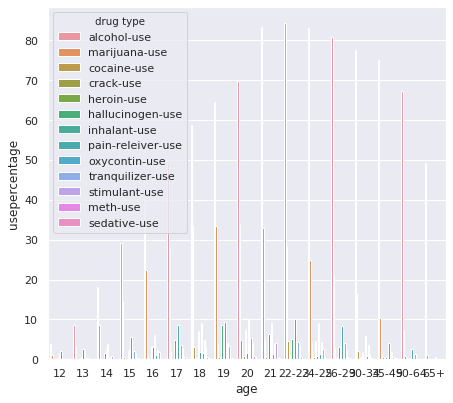

In [0]:
sns.set(rc={'figure.figsize':(15.7,14.27)})
plt.subplot(2,2,1)
#sns.factorplot(x='age', y='use percentage (past 12 mo)', hue='drug type', data=ax[ax['drug type'].str.contains("use")], kind='bar')
sns.barplot(x='age', y='usepercentage', hue='drug type', data=ax[ax['drug type'].str.contains("use")])

In [0]:
bx = ax[ax['drug type'].str.contains("frequency")]
bx.head()
bx.usepercentage.unique()
#bx.isnull().sum()
#bx['usepercentage(past12mo)'].value_counts()

array([3.0, 6.0, 5.0, 10.0, 13.0, 24.0, 36.0, 48.0, 52.0, 4.0, 15.0, 25.0,
       30.0, 60.0, 72.0, '5.0', '1.0', '5.5', '4.0', '7.0', '8.0', '6.0',
       '15.0', '36.0', '-', '3.0', '9.5', '21.0', '10.0', '2.0', '17.0',
       '48.0', '62.0', '35.5', '66.5', '64.0', '46.0', '180.0', '45.0',
       '30.0', '57.5', '88.0', '50.0', '66.0', '280.0', '41.0', '120.0',
       2.0, 44.0, '19.0', '12.0', '3.5', '13.5', 14.0, 12.0, 7.0, 9.0,
       22.0, '24.5', '4.5', '7.5', '17.5', '20.0', 25.5, 4.5, 11.0, 8.0,
       9.5, 364.0, '24.0', '10.5', '105.0', '54.0', '104.0', 19.0, 16.5,
       6.5, 17.5, 104.0], dtype=object)

In [0]:
ax1 = ax[ax['drug type'].str.contains("use")]
ax1.head()

,age,drug type,usepercentage
17,12,alcohol-use,3.9
18,13,alcohol-use,8.5
19,14,alcohol-use,18.1
20,15,alcohol-use,29.2
21,16,alcohol-use,40.1


In [0]:
bx1 = bx[(bx['usepercentage'] != '-')]
bx1.usepercentage.unique()
bx1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 34 to 458
Data columns (total 3 columns):
age              212 non-null object
drug type        212 non-null object
usepercentage    212 non-null object
dtypes: object(3)
memory usage: 6.6+ KB


In [0]:
bx1['usepercentage'] = bx1['usepercentage'].astype(float)
bx1.usepercentage.unique()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([  3. ,   6. ,   5. ,  10. ,  13. ,  24. ,  36. ,  48. ,  52. ,
         4. ,  15. ,  25. ,  30. ,  60. ,  72. ,   1. ,   5.5,   7. ,
         8. ,   9.5,  21. ,   2. ,  17. ,  62. ,  35.5,  66.5,  64. ,
        46. , 180. ,  45. ,  57.5,  88. ,  50. ,  66. , 280. ,  41. ,
       120. ,  44. ,  19. ,  12. ,   3.5,  13.5,  14. ,   9. ,  22. ,
        24.5,   4.5,   7.5,  17.5,  20. ,  25.5,  11. , 364. ,  10.5,
       105. ,  54. , 104. ,  16.5,   6.5])

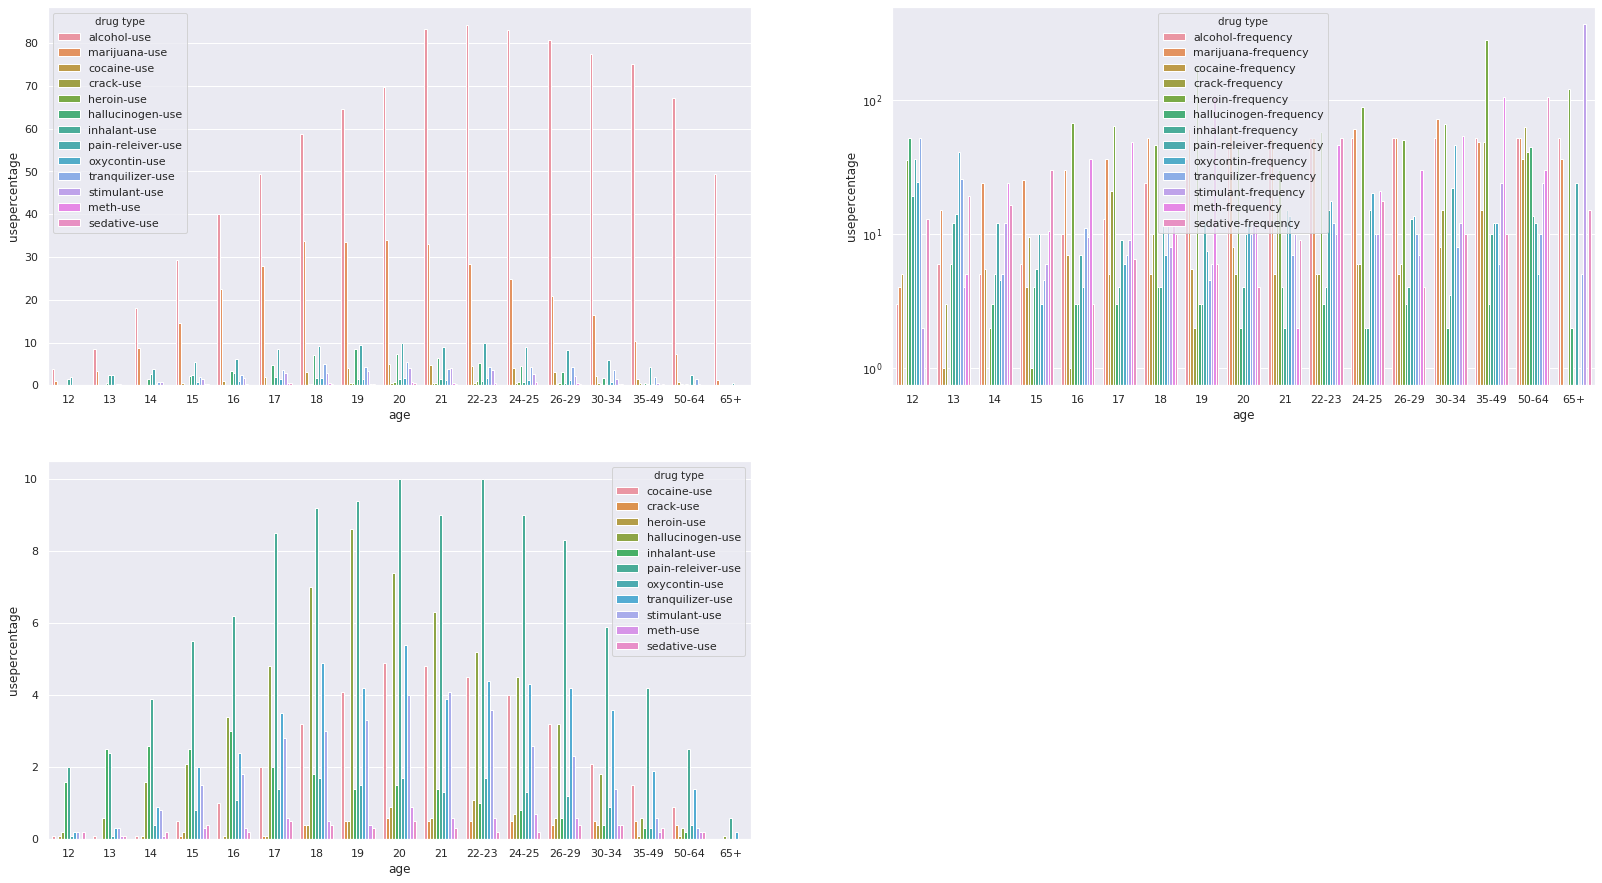

In [0]:
sns.set(rc={'figure.figsize':(24.7,14.27)})
plt.subplot(2,2,1)
#sns.factorplot(x='age', y='use percentage (past 12 mo)', hue='drug type', data=ax[ax['drug type'].str.contains("use")], kind='bar')
plot1= sns.barplot(x='age', y='usepercentage', hue='drug type', data=ax[ax['drug type'].str.contains("use")])

plt.subplot(2,2,2)
plot2 = sns.barplot(x='age', y='usepercentage', hue='drug type', data=bx1)
plot2.set_yscale('log')

plt.subplot(2,2,3)
plot3 = sns.barplot(x='age', y='usepercentage', hue='drug type', data=ax1[(ax1['drug type'] != 'alcohol-use') & (ax1['drug type'] != 'marijuana-use') ])

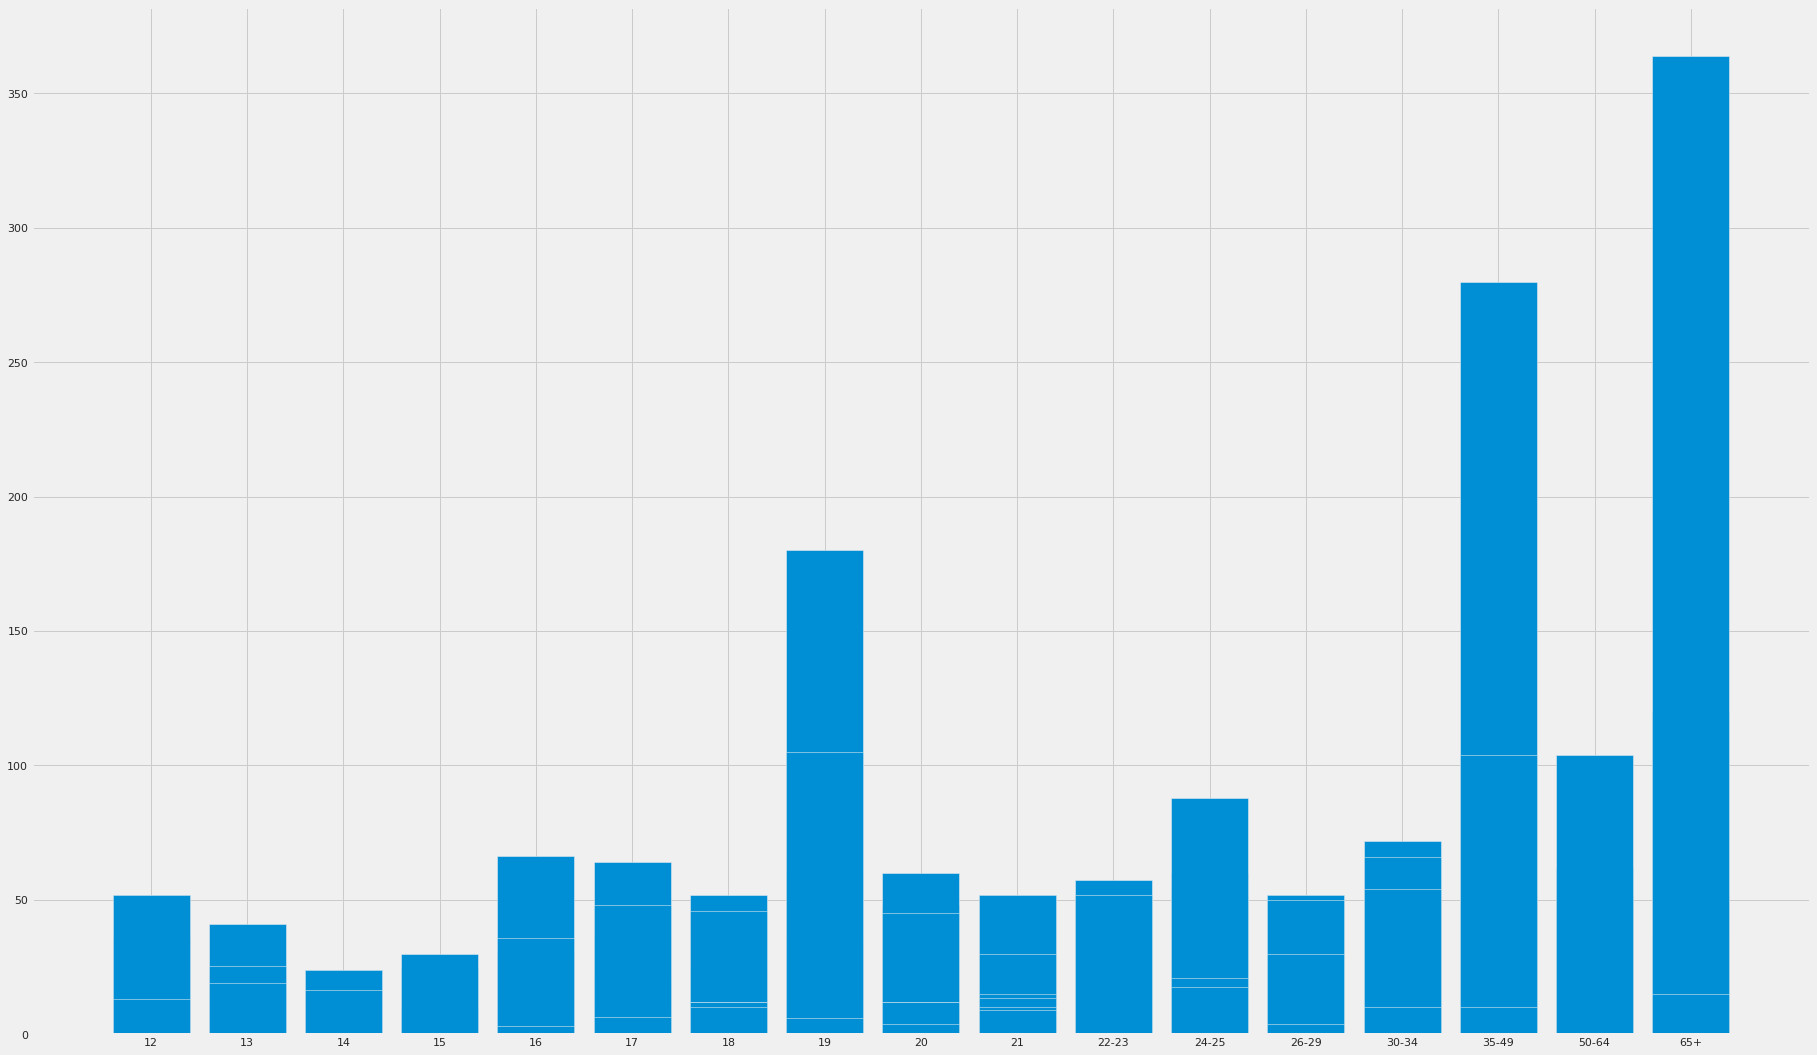

In [0]:
style.use('fivethirtyeight')
fig = plt.figure()
dx = fig.add_axes([0,0,1,1])
langs = bx1['age']
students = bx1['usepercentage']
dx.bar(langs,students)
plt.show()

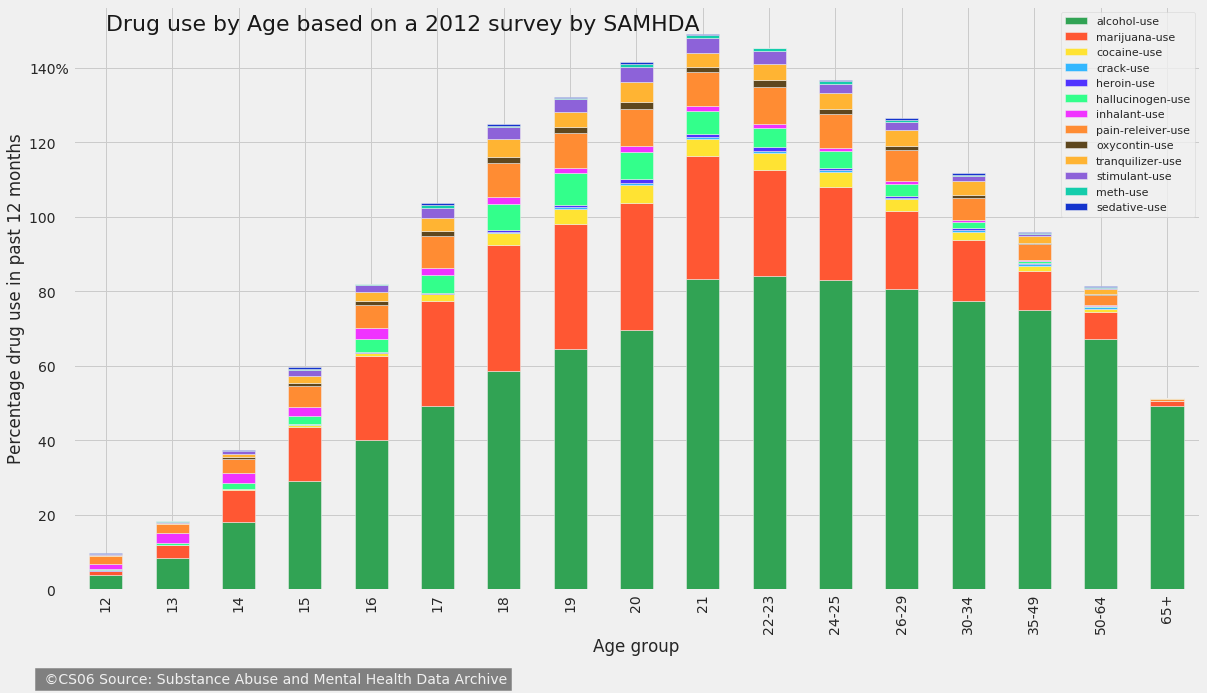

In [0]:
fig, ax3 = plt.subplots(figsize=(18,10))  
style.use('fivethirtyeight')
drugs = ax1['drug type'].drop_duplicates()
margin_bottom = np.zeros(len(ax1['age'].drop_duplicates()))
colors = ["#31A354", "#FF5733","#FFE333", "#33B7FF", "#5033FF", "#33FF8B", "#F033FF", "#FF8C33",'#5E471E', "#FFB433",'#8D62D9','#14CDAC','#1434CD']

for num, drug in enumerate(drugs):
    values = list(ax1[ax1['drug type'] == drug].loc[:, 'usepercentage'])

    fte_graph = ax1[ax1['drug type'] == drug].plot.bar(x='age',y='usepercentage', ax=ax3, stacked=True, 
                                    bottom = margin_bottom,color=colors[num], label=drug)
    margin_bottom += values
plt.ylabel("Percentage drug use in past 12 months")
plt.xlabel("Age group")
plt.legend(loc="upper right")
plt.text(x = 0, y = 150,
              s = """Drug use by Age based on a 2012 survey by SAMHDA""",
              fontsize = 22, color='black', alpha = .9)
fte_graph.set_yticklabels(labels = [ '0   ', '20   ', '40   ', '60   ', '80   ', '100   ','120   ', '140%'])
fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 14)
fte_graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

# The signature bar
fte_graph.text(x = -1, y = -25,
    s = ' ©CS06 Source: Substance Abuse and Mental Health Data Archive',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
plt.show()